In [15]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Activation, LSTM
import keras

%matplotlib inline

In [16]:
def read_stock_prices(file_name):
    raw_data = []
    with open(file_name, 'r') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        next(csv_reader)  # skip header
        for line in csv_reader:
            raw_data.append(line[4])
    stock_prices = np.array(raw_data)
    return stock_prices

def generate_data(series, window_size):
    # containers for input/output pairs
    X = []
    y = []

    for i in range(0, series.size - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])

    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X,y

In [21]:
window_size = 7

stock_prices = read_stock_prices('data/stock_apple.csv')
X_train, Y_train = generate_data(stock_prices, window_size)
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))

In [22]:
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))
          
# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
          
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 146.0
Trainable params: 146
Non-trainable params: 0.0
_________________________________________________________________


In [32]:
model.fit(X_train, Y_train, epochs=1000, batch_size=50, verbose=1)

Epoch 1/1000
185/185 [==============================] - 0s - loss: 19.6418     
Epoch 2/1000
185/185 [==============================] - 0s - loss: 19.2652     
Epoch 3/1000
185/185 [==============================] - 0s - loss: 21.4598     
Epoch 4/1000
185/185 [==============================] - 0s - loss: 20.3807     
Epoch 5/1000
185/185 [==============================] - 0s - loss: 20.5634     
Epoch 6/1000
185/185 [==============================] - 0s - loss: 19.6411     
Epoch 7/1000
185/185 [==============================] - 0s

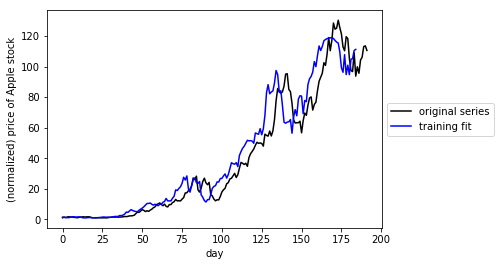

In [33]:
train_predict = model.predict(X_train)

import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(stock_prices,color = 'k')

# plot training set prediction
split_pt = 185
plt.plot(np.arange(0,split_pt,1),train_predict,color = 'b')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()